In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import isamcalc_lib as isam
import os
import copy
from netCDF4 import Dataset as NetCDFFile

In [2]:
fout_30 = 'ncscdv2_soilc_30cm_0.5x0.5.nc'
fout_70 = 'ncscdv2_soilc_70cm_0.5x0.5.nc'
fdata_1m = 'ncscdv2_soilc_0.5x0.5.nc'
fdata_30 = 'NCSCDv2_Circumpolar_WGS84_SOCC30_05deg.nc'
fdata_100 = 'NCSCDv2_Circumpolar_WGS84_SOCC100_05deg.nc'

In [4]:
nc=NetCDFFile(fdata_1m,'r')
soc1m = nc.variables['soilc'][:]
nc.close()

nc=NetCDFFile(fdata_30,'r')
soc30 = nc.variables['NCSCDv2'][:]/10.
nc.close()

nc=NetCDFFile(fdata_100,'r')
soc100 = nc.variables['NCSCDv2'][:]/10.
nc.close()

ratio=soc30/soc100

soc30cm = copy.deepcopy(soc1m)
soc30cm[0,249:360,:] = soc30[::-1,:]
soc70cm = copy.deepcopy(soc1m)
soc70cm[0,249:360,:] = soc100[::-1,:] - soc30[::-1, :]


In [18]:
# Store back 30cm and 70cm SOC into the
nclu_obs=NetCDFFile(fout_30,'a')
nclu_obs.variables['soilc'][:] = soc30cm
nclu_obs.close()

nclu_obs=NetCDFFile(fout_70,'a')
nclu_obs.variables['soilc'][:] = soc70cm
nclu_obs.close()

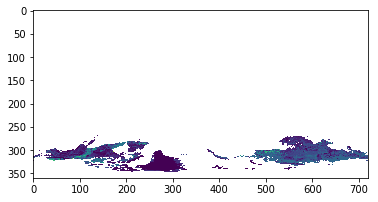